In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

dataSet = pd.read_csv(
    "C:/Users/adity/OneDrive/Desktop/Sixth Semester/CE6018 Seismic Data Analytics/Program/Week6  Nerual Network/ResampledTime/req_resampledTime_X.csv")
# for i in dataSet.columns:
#     print(i)

Xreq = dataSet[["Earthquake Magnitude",
                    "Hypocenter Depth (km)", "Joyner-Boore Dist. (km)", "Vs30 (m/s) selected for analysis"]]

# Yreq = dataSet[["0.401606426", "0.903614458", "1.40562249", "1.907630522", "2.409638554", "2.911646586", "3.413654618", "3.915662651", "4.417670683", "4.919678715", "5.421686747", "5.923694779", "6.425702811", "6.927710843", "7.429718876", "7.931726908", "8.43373494", "8.935742972", "9.437751004", "9.939759036", "10.44176707", "10.9437751", "11.44578313", "11.94779116", "12.4497992", "12.95180723", "13.45381526", "13.95582329", "14.45783133", "14.95983936", "15.46184739", "15.96385542", "16.46586345", "16.96787149", "17.46987952", "17.97188755", "18.47389558", "18.97590361", "19.47791165", "19.97991968", "20.48192771", "20.98393574", "21.48594378", "21.98795181", "22.48995984", "22.99196787", "23.4939759", "23.99598394", "24.49799197", "25"
#                   ]]

Yreq = dataSet[["0", "0.206896552", "0.413793103", "0.620689655", "0.827586207", "1.034482759", "1.24137931", "1.448275862", "1.655172414", "1.862068966", "2.068965517", "2.275862069", "2.482758621", "2.689655172", "2.896551724", "3.103448276", "3.310344828", "3.517241379", "3.724137931", "3.931034483", "4.137931034", "4.344827586", "4.551724138", "4.75862069", "4.965517241", "5.172413793", "5.379310345", "5.586206897", "5.793103448", "6"
               ]]
# Yreq = dataSet[["0.401606426"]]

scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
features = scalerX.fit_transform(Xreq)
target = scalerY.fit_transform(Yreq)

In [6]:
# using Xgboost as the linear regressor for dataset (Trial)
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

# model = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
import matplotlib.pyplot as plt


# Train the model
model.fit(x_train, y_train)
y2_pred = model.predict(x_test)
y1_pred = model.predict(x_train)

print(
    f'Mean Squared Error for Training: {mean_squared_error(y_train,y1_pred )}')
print(
    f'Mean Squared Error for Test: {mean_squared_error(y_test, y2_pred)}')
print("R2-Score for Train:", r2_score(y1_pred, y_train))
print("R2-Score for Test:", r2_score(y2_pred, y_test))

Mean Squared Error for Training: 9.929374909796963e-06
Mean Squared Error for Test: 0.0003880429727844589
R2-Score for Train: 0.9253793635534389
R2-Score for Test: -93.25702867643467


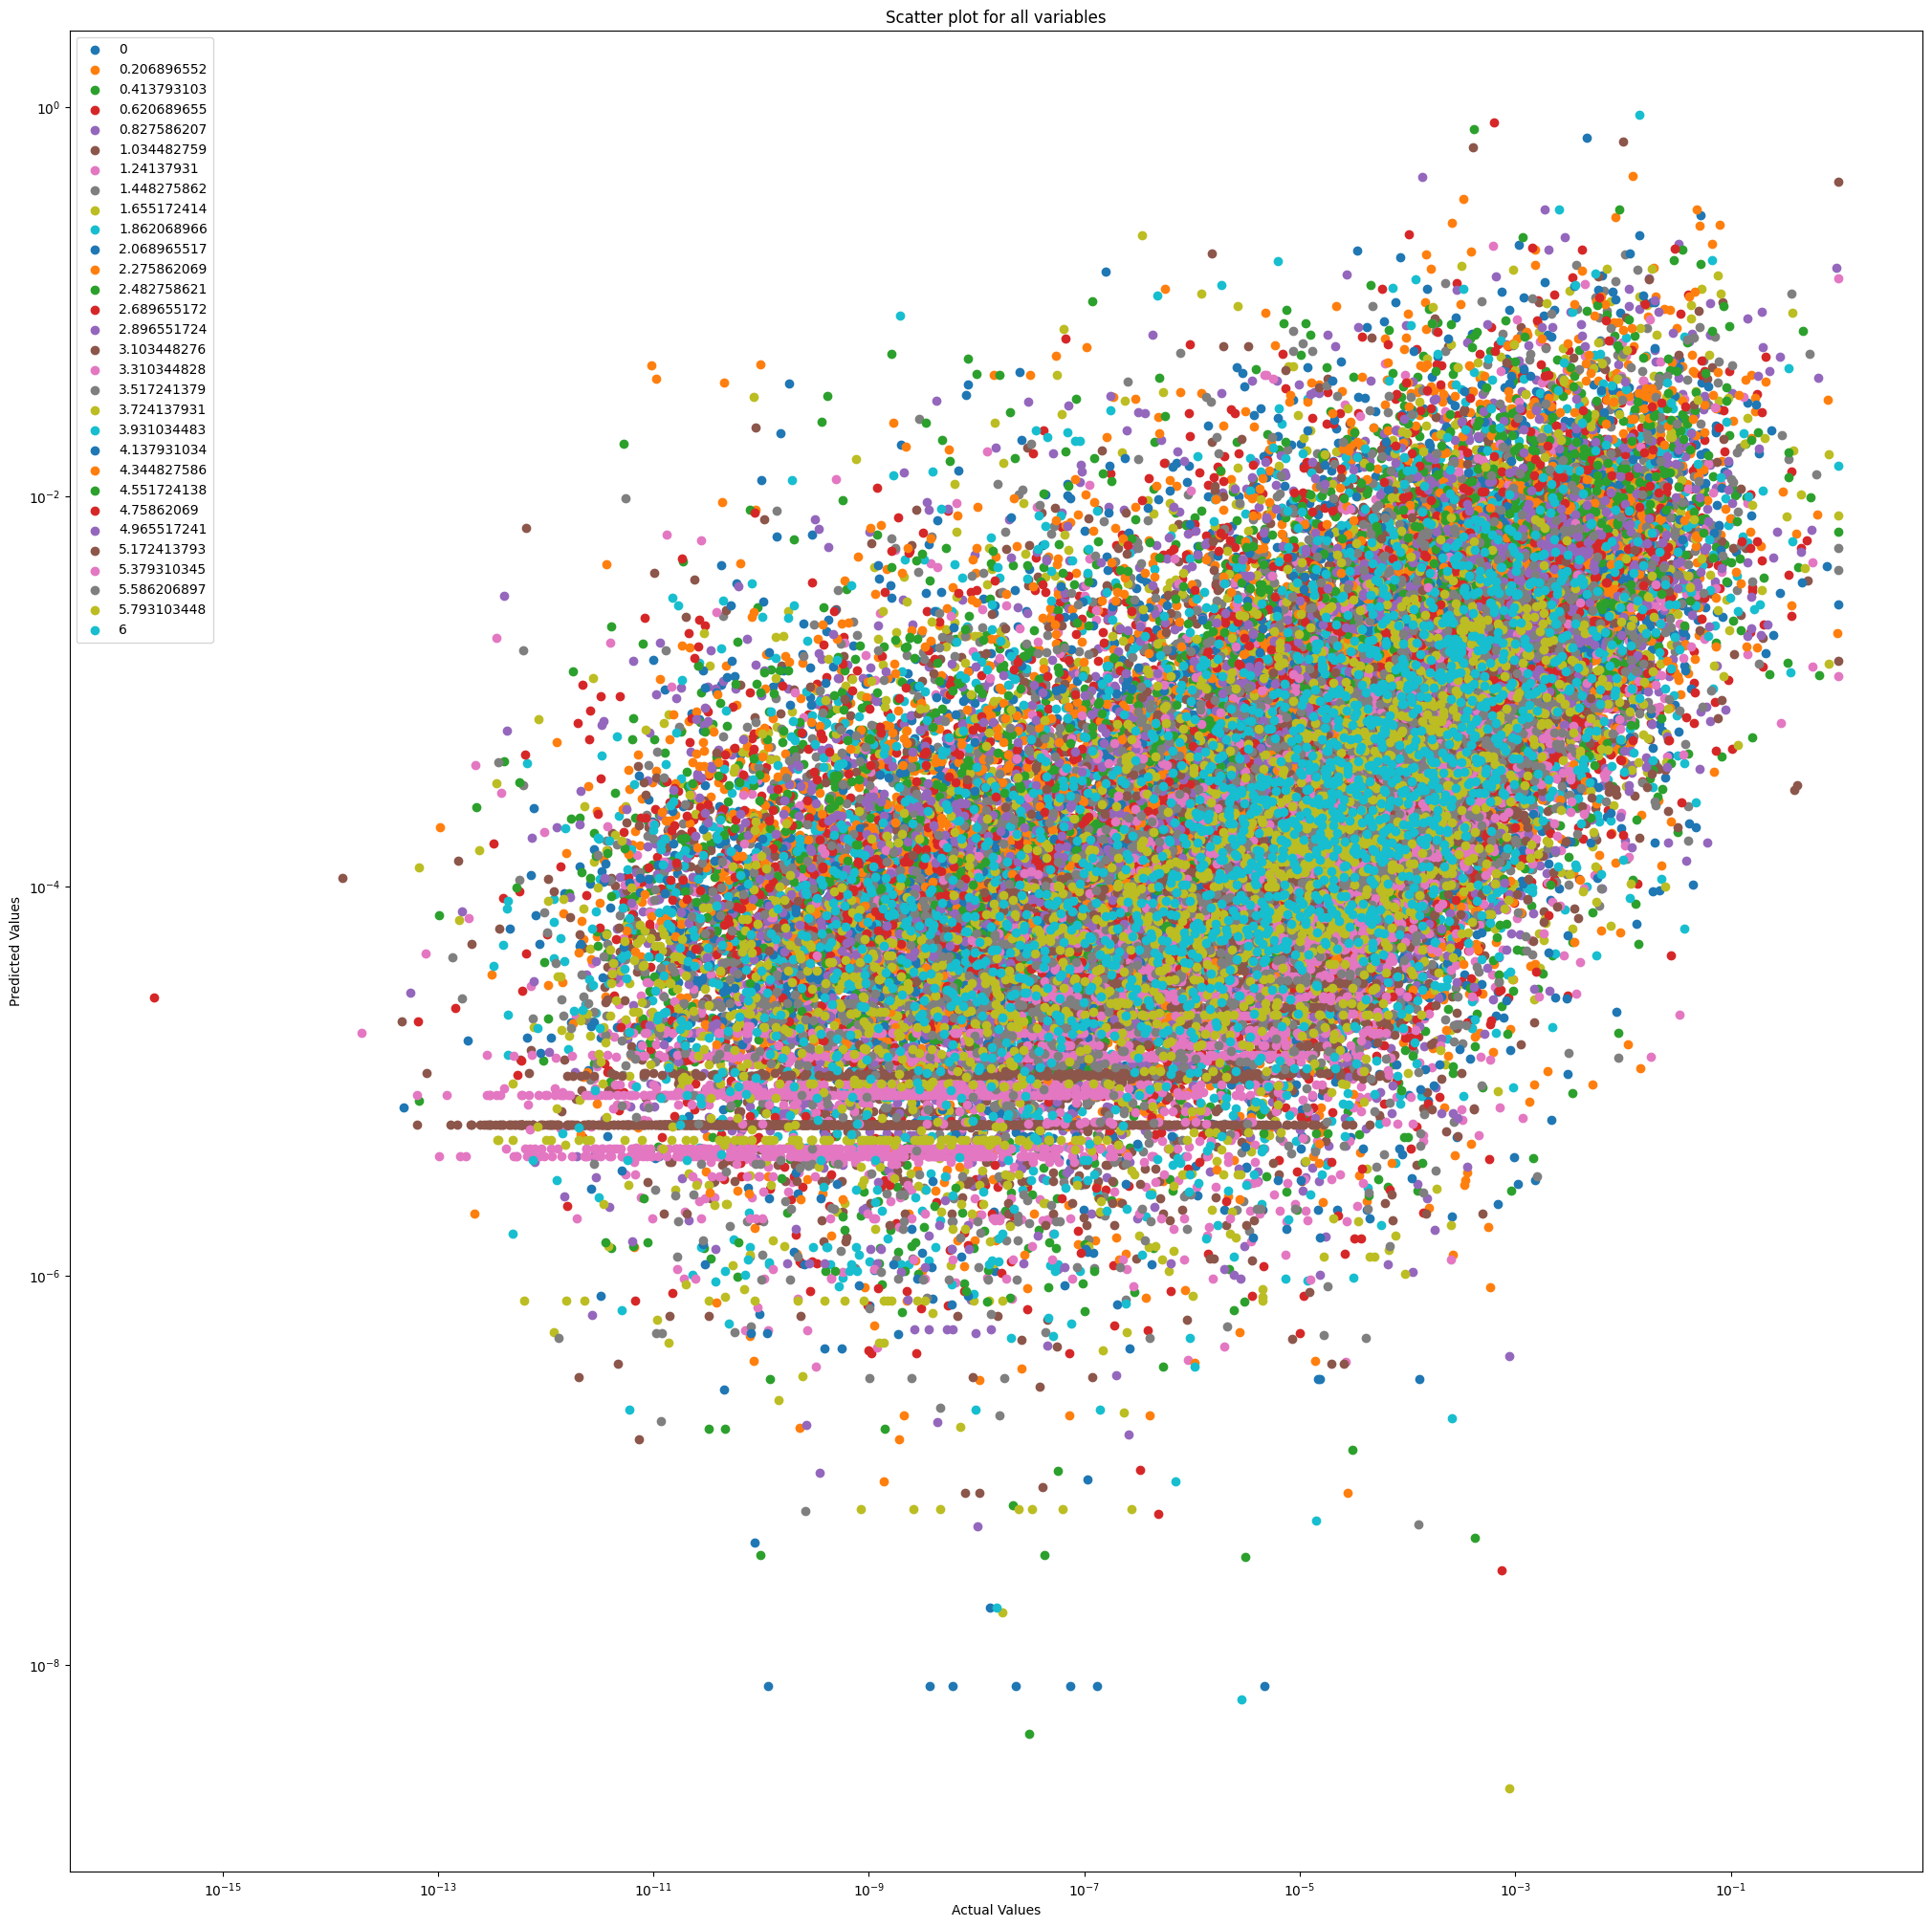

In [7]:


y_test= pd.DataFrame(y_test,columns=Yreq.columns)
predictions_df= pd.DataFrame(y2_pred,columns=Yreq.columns)
Fseries=list(predictions_df.columns)

plt.figure(figsize=(25,25))  # Set the size of the figure

for i in Fseries:
    plt.scatter(y_test[i], predictions_df[i], label=i)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter plot for all variables')
plt.legend()
plt.show()
